In [1]:
# Import Dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine,reflect = True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Query database

In [9]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [10]:
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [11]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print (c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print (c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

#### Design a query to retrieve the last 12 months of precipitation data and plot the results. 

In [13]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [14]:
# Calculate the date one year from the last date in data set.
query_date = dt.date(2017,8,23) - dt.timedelta(days = 365)
print(query_date)

2016-08-23


In [15]:
# Perform a query to retrieve the data and precipitation scores of the last 12 months
precipitation = session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date >= query_date).all()
    #order_by(Measurement.date).all()

In [16]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(precipitation, columns = ['Date', 'Precipitation'])
#df["Date"] = pd.to_datetime(df["Date"])
df.set_index('Date', inplace=True)

df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [17]:
#df.set_index('Date', inplace=True)

In [18]:
# Sort the dataframe by date
clean_df = df.sort_values(['Date'])
clean_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


In [19]:
# drop rows that have NaN values
clean_df = clean_df.dropna()
#clean_df = df.fillna(0)
clean_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70


In [20]:
#clean_df.isnull().values.any()

In [21]:
#clean_df.dtypes

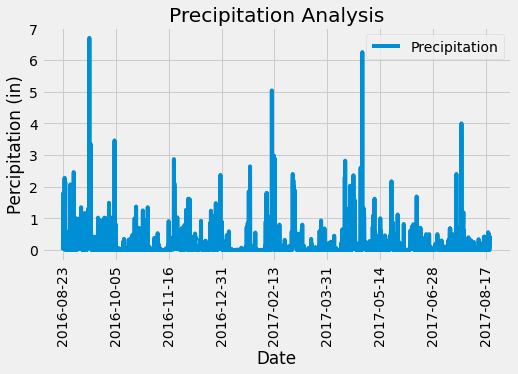

In [41]:
# Use Pandas Plotting with Matplotlib to plot the data
ax=clean_df.plot(title='Precipitation Analysis',rot=90,figsize=(7.5,4))
#plt.legend(loc='upper right')
ax.set_ylabel('Percipitation (in)')
#ax.set_xlabel('Date')
#ax.set_xlim(-100.0, 2230)
#ax.set_ylim(-0.335, 7.035)
#ax.xaxis.label.set_visible(True)
#ax.legend(loc='upper right')

plt.savefig('Images/precipitation.png',bbox_inches='tight',dpi = 150)


In [42]:
ax.get_xlim()

(-101.0, 2121.0)

In [43]:
ax.get_ylim()

(-0.335, 7.035)

In [45]:
# Use Pandas to calcualte the summary statistics for the precipitation data
clean_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [26]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [27]:
# Design a query to calculate the total number stations in the dataset


In [28]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [29]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [30]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [31]:
# Close Session
session.close()